In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sea 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [2]:
trainData=pd.read_csv('wineQualityRed_train.csv', sep=';')
testData=pd.read_csv('wineQualityRed_test.csv', sep=';')
dataTrain=trainData.copy()
dataTest=testData.copy()
print(dataTrain.shape)
print(dataTest.shape)


(1119, 12)
(480, 12)


In [3]:
print(dataTrain.isnull().any())
print()
print(dataTest.isnull().any())

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool


In [4]:
dataTrain['quality']=(trainData['quality']>=7).astype(int)
dataTest['quality']=(testData['quality']>=7).astype(int)
X_train=dataTrain[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
Y_train=dataTrain['quality']
X_test=dataTest[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]
Y_test=dataTest['quality']
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(1119, 11)
(1119,)
(480, 11)
(480,)


In [5]:
dataTrain['quality'].value_counts()


0    956
1    163
Name: quality, dtype: int64

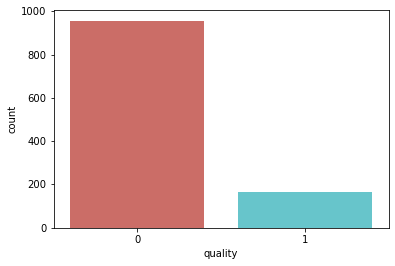

In [6]:
sea.countplot(x='quality', data=dataTrain, palette='hls')
plt.show()

In [7]:
dataTrain.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
0,8.122176,0.547908,0.242301,2.517416,0.086429,16.478556,45.726987,0.996640,3.321967,0.626977,10.382148
1,8.503681,0.385583,0.362515,2.632515,0.072718,14.680982,34.662577,0.995452,3.295951,0.729080,11.652863


In [8]:
from sklearn.metrics import accuracy_score
regressor = LogisticRegression()
regressor.fit(X_train, Y_train)

Y_pred = regressor.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(regressor.score(X_test, Y_test)))
print('Accuracy score: {}'.format(accuracy_score(Y_test, Y_pred)))

Accuracy of logistic regression classifier on test set: 0.88
Accuracy score: 0.8791666666666667


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1, 'Confusion Matrix')

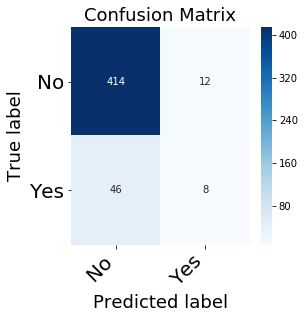

In [9]:
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(Y_test, Y_pred)

df_cm = pd.DataFrame(confusion_matrix, index=['No', 'Yes'], columns=['No', 'Yes'])
plt.figure(figsize=(4, 4))  
heatmap = sea.heatmap(df_cm, annot=True, cmap='Blues', fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [10]:
from sklearn.metrics import classification_report
print('Classification Report for Logistic Regression:')
print()
print(classification_report(Y_test, Y_pred))

total=sum(sum(confusion_matrix))
accuracy=(confusion_matrix[0,0]+confusion_matrix[1,1])/total
sensitivity = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
specificity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
recall=confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
precision=confusion_matrix[1,1]/(confusion_matrix[0, 1]+confusion_matrix[1,1])
fScore=2*(precision*recall)/(precision+recall)

print('Evaluation Metrics for Logistic Regression: ')
print()
print ('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity )
print('Specificity : ', specificity)
print('Recall Score : ', metrics.recall_score(Y_test, Y_pred))
print('Precision: ', precision)
print('F_score: ', fScore)

Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       426
           1       0.40      0.15      0.22        54

    accuracy                           0.88       480
   macro avg       0.65      0.56      0.58       480
weighted avg       0.84      0.88      0.85       480

Evaluation Metrics for Logistic Regression: 

Accuracy :  0.8791666666666667
Sensitivity :  0.14814814814814814
Specificity :  0.971830985915493
Recall Score :  0.14814814814814814
Precision:  0.4
F_score:  0.21621621621621623


In [11]:
import statsmodels.api as sm
logit_model=sm.Logit(Y_train, X_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.273333
         Iterations 8
                            Results: Logit
Model:                 Logit             Pseudo R-squared:  0.342     
Dependent Variable:    quality           AIC:               633.7201  
Date:                  2020-10-10 09:04  BIC:               688.9422  
No. Observations:      1119              Log-Likelihood:    -305.86   
Df Model:              10                LL-Null:           -464.52   
Df Residuals:          1108              LLR p-value:       3.3839e-62
Converged:             1.0000            Scale:             1.0000    
No. Iterations:        8.0000                                         
----------------------------------------------------------------------
                      Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------
fixed acidity         -0.0247   0.0977 -0.2525 0.8006  -0.2161  0.1668
vol

In [12]:
X_train_Pval=dataTrain[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']]
Y_train_Pval=dataTrain['quality']
X_test_Pval=dataTest[['volatile acidity', 'chlorides', 'total sulfur dioxide', 'sulphates', 'alcohol']]
Y_test_Pval=dataTest['quality']

In [13]:
regressor = LogisticRegression()
regressor.fit(X_train_Pval, Y_train_Pval)

Y_pred_Pval = regressor.predict(X_test_Pval)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(regressor.score(X_test_Pval, Y_test_Pval)))
print('Accuracy score: {}'.format(accuracy_score(Y_test_Pval, Y_pred_Pval)))

Accuracy of logistic regression classifier on test set: 0.89
Accuracy score: 0.8875


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1, 'Confusion Matrix')

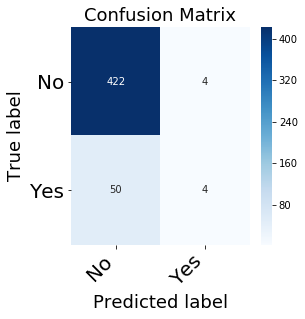

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix_Pval = confusion_matrix(Y_test, Y_pred_Pval)

df_cm_Pval = pd.DataFrame(confusion_matrix_Pval, index=['No', 'Yes'], columns=['No', 'Yes'])
plt.figure(figsize=(4, 4))  
heatmap = sea.heatmap(df_cm_Pval, annot=True, cmap='Blues', fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [15]:
from sklearn.metrics import classification_report
print('Classification Report for Logistic Regression with p-value features:')
print()
print(classification_report(Y_test, Y_pred_Pval))

total=sum(sum(confusion_matrix_Pval))
accuracy=(confusion_matrix_Pval[0,0]+confusion_matrix_Pval[1,1])/total
sensitivity = confusion_matrix_Pval[1,1]/(confusion_matrix_Pval[1,0]+confusion_matrix_Pval[1,1])
specificity = confusion_matrix_Pval[0,0]/(confusion_matrix_Pval[0,0]+confusion_matrix_Pval[0,1])
recall=confusion_matrix_Pval[1,1]/(confusion_matrix_Pval[1,0]+confusion_matrix_Pval[1,1])
precision=confusion_matrix_Pval[1,1]/(confusion_matrix_Pval[0, 1]+confusion_matrix_Pval[1,1])
fScore=2*(precision*recall)/(precision+recall)

print('Evaluation Metrics for Logistic Regression with p-value features: ')
print()
print ('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity )
print('Specificity : ', specificity)
print('Recall Score : ', recall)
print('Precision: ', precision)
print('F_score: ', fScore)

Classification Report for Logistic Regression with p-value features:

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       426
           1       0.50      0.07      0.13        54

    accuracy                           0.89       480
   macro avg       0.70      0.53      0.53       480
weighted avg       0.85      0.89      0.85       480

Evaluation Metrics for Logistic Regression with p-value features: 

Accuracy :  0.8875
Sensitivity :  0.07407407407407407
Specificity :  0.9906103286384976
Recall Score :  0.07407407407407407
Precision:  0.5
F_score:  0.12903225806451613


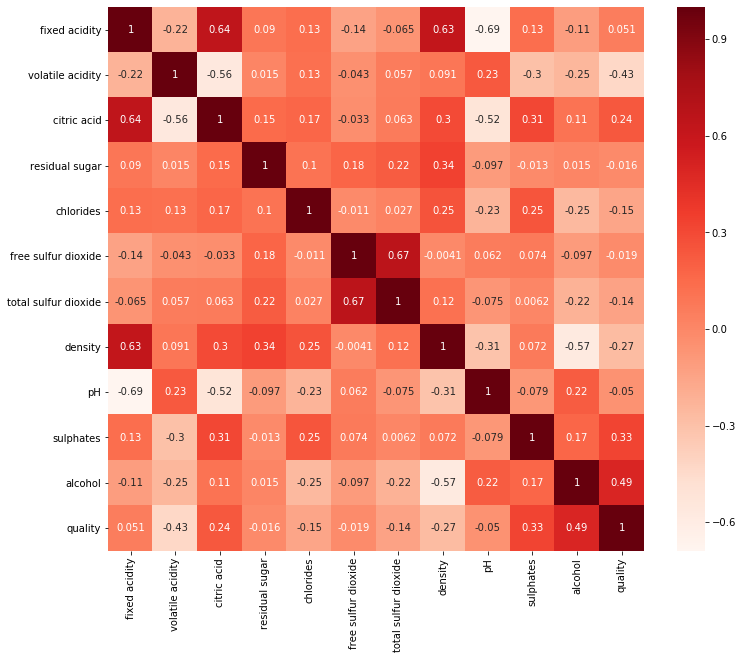

In [16]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
corr = trainData.corr()
sea.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [17]:
#Correlation with output variable
corr_target = abs(corr['quality'])
#Selecting highly correlated features
relevant_features = corr_target[corr_target>0.3]
relevant_features

volatile acidity    0.426341
sulphates           0.325453
alcohol             0.492111
quality             1.000000
Name: quality, dtype: float64

In [18]:
X_train_3var=dataTrain[['volatile acidity', 'sulphates', 'alcohol']]
Y_train_3var=dataTrain['quality']
X_test_3var=dataTest[['volatile acidity', 'sulphates', 'alcohol']]
Y_test_3var=dataTest['quality']

In [19]:
regressor = LogisticRegression()
regressor.fit(X_train_3var, Y_train_3var)

Y_pred_3var = regressor.predict(X_test_3var)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(regressor.score(X_test_3var, Y_test_3var)))
print('Accuracy score: {}'.format(accuracy_score(Y_test_3var, Y_pred_3var)))

Accuracy of logistic regression classifier on test set: 0.89
Accuracy score: 0.8895833333333333


/srv/conda/envs/notebook/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 1, 'Confusion Matrix')

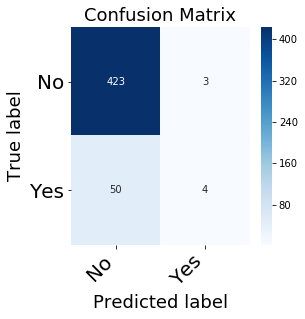

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix_3var = confusion_matrix(Y_test, Y_pred_3var)

df_cm_3var = pd.DataFrame(confusion_matrix_3var, index=['No', 'Yes'], columns=['No', 'Yes'])
plt.figure(figsize=(4, 4))  
heatmap = sea.heatmap(df_cm_3var, annot=True, cmap='Blues', fmt='g')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=20)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=20)
plt.ylabel('True label', fontsize=18)
plt.xlabel('Predicted label', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)

In [21]:
print('Classification Report for Logistic Regression with 3 features (based on Pearson coefficient):')
print()
print(classification_report(Y_test, Y_pred_3var))

total=sum(sum(confusion_matrix_3var))
accuracy=(confusion_matrix_3var[0,0]+confusion_matrix_3var[1,1])/total
sensitivity = confusion_matrix_3var[1,1]/(confusion_matrix_3var[1,0]+confusion_matrix_3var[1,1])
specificity = confusion_matrix_3var[0,0]/(confusion_matrix_3var[0,0]+confusion_matrix_3var[0,1])
recall=confusion_matrix_3var[1,1]/(confusion_matrix_3var[1,0]+confusion_matrix_3var[1,1])
precision=confusion_matrix_3var[1,1]/(confusion_matrix_3var[0, 1]+confusion_matrix_3var[1,1])
fScore=2*(precision*recall)/(precision+recall)

print('Evaluation Metrics for LOgistic Regression with 3 features (based on Pearson coefficient): ')
print()
print ('Accuracy : ', accuracy)
print('Sensitivity : ', sensitivity )
print('Specificity : ', specificity)
print('Recall Score : ', recall)
print('Precision: ', precision)
print('F_score: ', fScore)

Classification Report for Logistic Regression with 3 features (based on Pearson coefficient):

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       426
           1       0.57      0.07      0.13        54

    accuracy                           0.89       480
   macro avg       0.73      0.53      0.54       480
weighted avg       0.86      0.89      0.85       480

Evaluation Metrics for LOgistic Regression with 3 features (based on Pearson coefficient): 

Accuracy :  0.8895833333333333
Sensitivity :  0.07407407407407407
Specificity :  0.9929577464788732
Recall Score :  0.07407407407407407
Precision:  0.5714285714285714
F_score:  0.13114754098360656
